<a href="https://colab.research.google.com/github/famirteimoury/Artificial-Intelligence/blob/main/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import math 
import matplotlib.pyplot as plt

In [36]:
class particle:

  
  def __init__(self, nVar):
    self. position = np.zeros((1, nVar))
    self.cost = np.zeros ((1,1))
    self.velocity = np.zeros((1, nVar))
    self. best_position = np.zeros((1, nVar))
    self.best_cost = np.zeros ((1,1))
  
  def Update_position (self):

    return self.position + self.velocity

  def Update_velocity (self,w, c1, c2 ,nVar, globalbst):

    temp1 = c1 * np.random.uniform (low = 0, high = 1, size = nVar)
    temp1 = np.reshape (temp1, (1, temp1.shape[0]))
    temp2 = c2 * np.random.uniform (low = 0, high = 1, size = nVar)
    temp2 = np.reshape (temp2, (1, temp2.shape[0]))

    subtracted1 = np.subtract(self.best_position, self.position)
    subtracted2 = np.subtract(globalbst.position, self.position)
    inertia_velocity = w * self.velocity
    cognative_velocity = temp1 * subtracted1
    social_velocity = temp2 *subtracted2
    updated_velocity = inertia_velocity + cognative_velocity + social_velocity 
    return updated_velocity
    
  def __repr__(self):
    return f"particle('{self. position}', '{self.cost}', '{self.velocity}', '{self.best_position}', '{self.best_cost}')"


In [37]:
def CostFunction (x):
  return np.sum (np.power(x, 2)) 

the best cost in the iteration 0 is  96.3052961280557
the best cost in the iteration 1 is  56.37497451450314
the best cost in the iteration 2 is  56.37497451450314
the best cost in the iteration 3 is  56.37497451450314
the best cost in the iteration 4 is  49.6211386865435
the best cost in the iteration 5 is  49.6211386865435
the best cost in the iteration 6 is  49.6211386865435
the best cost in the iteration 7 is  49.6211386865435
the best cost in the iteration 8 is  49.6211386865435
the best cost in the iteration 9 is  49.6211386865435
the best cost in the iteration 10 is  49.6211386865435
the best cost in the iteration 11 is  49.6211386865435
the best cost in the iteration 12 is  49.6211386865435
the best cost in the iteration 13 is  49.6211386865435
the best cost in the iteration 14 is  49.6211386865435
the best cost in the iteration 15 is  49.6211386865435
the best cost in the iteration 16 is  49.6211386865435
the best cost in the iteration 17 is  49.6211386865435
the best cost in 

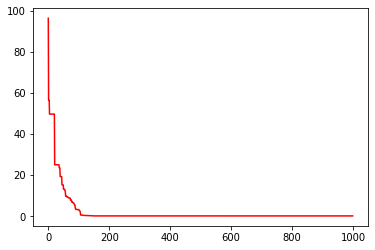

In [38]:
nVar = 10
VarSize = np. zeros ((1, nVar), dtype = int)
VarMin = -10
VarMax = 10
MaxIt = 1000
nPop = 5
# PSO Parameters
w = 1
wdamp = 0.99
c1 = 1.5
c2 = 2.1
VelMax = 0.2 * (VarMax - VarMin)
VelMin = -VelMax

# initialization 
GlobalBest = particle (nVar)
GlobalBest.cost =  math.inf
particles  = [] 
for i in range (nPop):
  prtlc = particle (nVar)
  particles.append (prtlc)
for i in range (nPop):
  particles [i].position = np.random.uniform (low = VarMin, high = VarMax, size = VarSize.shape)
  particles [i].velocity = np.zeros (VarSize.shape, dtype = float)
  particles [i].cost = CostFunction (particles[i].position)
  particles [i].best_position = particles [i].position
  particles [i].best_cost = particles [i].cost
  if particles [i].best_cost < GlobalBest.cost:
     GlobalBest = particles [i]
BestCost = np.zeros ((MaxIt, 1))

# PSO Main Loop
for it in range (MaxIt):
  for i in range (nPop):
    #Update velocity
    
    particles [i].velocity = particles[i].Update_velocity (w, c1, c2 ,nVar, GlobalBest)

    #Apply velocity limit

    for k in range (nVar):
      particles[i].velocity[0, k] = max (particles[i].velocity[0, k],VelMin)
      particles [i].velocity[0, k] = min (particles[i].velocity[0, k],VelMax)
    
    #Update position 
    particles[i].position = particles[i].Update_position ()
    # Apply Position Limits
    for k in range (nVar):
      particles[i].position[0, k] = max (particles[i].position[0, k],VarMin)
      particles[i].position[0, k] = min (particles[i].position[0, k],VarMax)
    #Evaluation 
    particles[i].cost = CostFunction(particles[i].position)
    # Update Personal Best
    if particles[i].cost < particles[i].best_cost :
      particles[i].best_position = particles[i].position
      particles[i].best_cost = particles[i].cost
      # Update Global Best
      if particles[i].best_cost < GlobalBest.best_cost:
        GlobalBest = particles[i]
  BestCost[it, 0] = GlobalBest.best_cost
  if it % 1 == 0:
    print ('the best cost in the iteration', it,'is ', BestCost[it, 0]) 
  w = w * wdamp
bestsol = GlobalBest
print ("best cost function is ", GlobalBest.best_cost)
plt.plot (list(range(BestCost.shape [0])), np.reshape(BestCost,-1), label = "error", color = 'red')
plt.show()
